<a href="https://colab.research.google.com/github/ch3rnoalpha/Sales_predictions---john-paredes/blob/main/Project_core_5_John_paredes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project core 5

John paredes

In [ ]:
#imports drive and mounts it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
###################################################
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import set_config
####################################################
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
set_config(display='diagram')

In [ ]:
#sets filepath as file name and creates dataframe
filename = '/content/drive/MyDrive/CodingDojo/Data files/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#drops na data
df.dropna(inplace = True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#shows the shape of the dataframe
df.shape

In [ ]:
#shows data types
df.dtypes

In [ ]:
#shows thats null
df.isnull().sum()

In [ ]:
################################################################################################################################
#Beginning of train test split

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Split
X = df.drop(columns = ['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

In [ ]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

In [ ]:
#fit on train
preprocessor.fit(X_train)

In [ ]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Obtain descriptive statistics of your features
X_train.describe().round(0)

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded - Pulled this from reading
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

In [ ]:
# End of train test split
################################################################################################################################

In [ ]:
#====================================================================================================================================

In [ ]:
#checks for catagorical data errors

In [ ]:
df['Item_Identifier'].value_counts() 

In [ ]:
df['Item_Fat_Content'].value_counts() 

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Type'].value_counts() 

In [ ]:
df['Outlet_Identifier'].value_counts() 

In [ ]:
df['Outlet_Size'].value_counts() 

In [ ]:
df['Outlet_Location_Type'].value_counts() 

In [ ]:
df['Outlet_Type'].value_counts() 

In [ ]:
#====================================================================================================================================

In [ ]:
# corrects catagorical data errors

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat');
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'Regular');
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat', 'Low Fat');

In [ ]:
#====================================================================================================================================

In [ ]:
#prints info on colums that are numerical (float or int)
for col in df.columns:
  if df[col].dtypes == float or  df[col].dtypes == int:
    print(df[col].describe())


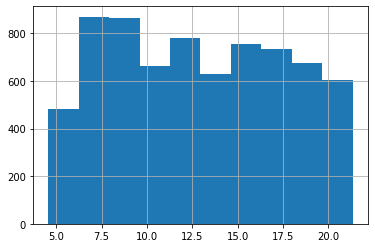

In [ ]:
# Histogram of item weights
df['Item_Weight'].hist()
plt.ticklabel_format(useOffset=False, style='plain')

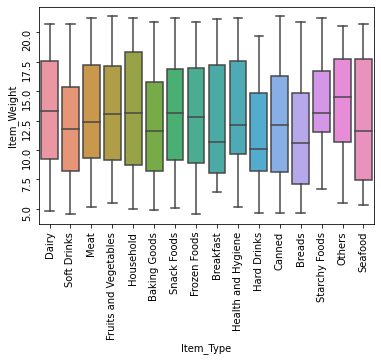

In [ ]:
#Boxplot of item type compared to item weight, shows overall averages
ax = sns.boxplot(x='Item_Type', y='Item_Weight', data=df)
ax.tick_params(labelrotation=90)

In [ ]:
#creates a correlation chart of all numerical imputs for the df
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


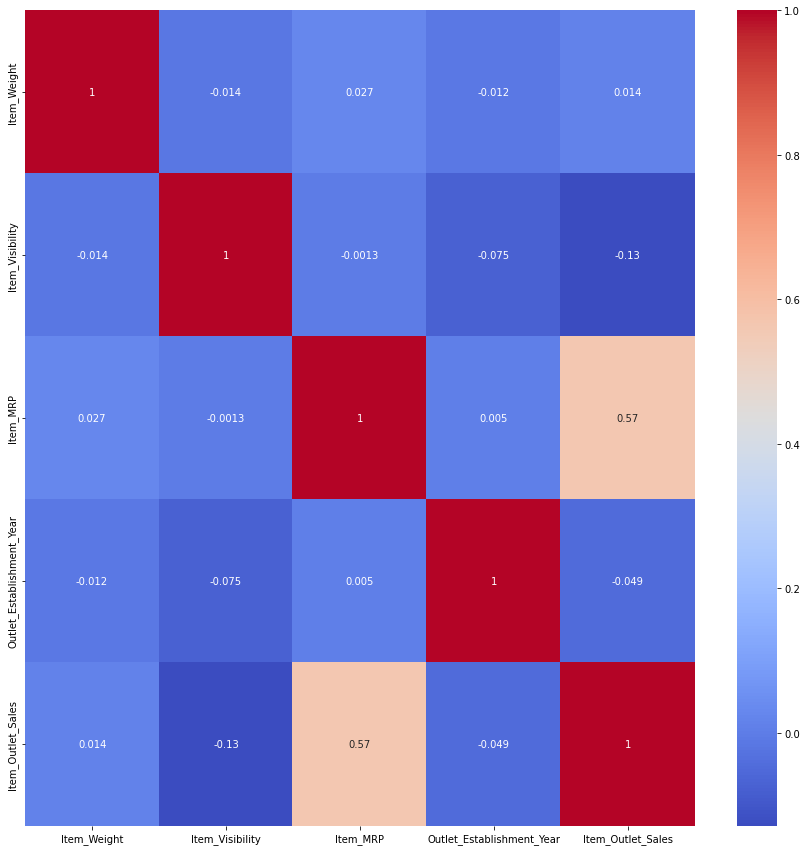

In [ ]:
#creates a basic heatmap comparing numerical datapoints, looks for correlations
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [ ]:
#creates a mean index of outlet year established
line_df = df.groupby('Outlet_Establishment_Year').mean()
line_df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Outlet_Establishment_Year,,,,
1985,NaN,0.076597,139.796485,2483.677474
1987,13.006148,0.059957,141.425982,2298.995256
1997,12.866801,0.060464,142.057387,2277.844267
1998,12.913153,0.101457,140.777594,339.351662
1999,12.917446,0.060806,140.297699,2348.354635
2002,12.649989,0.060474,140.950246,2192.384798
2004,12.829349,0.061263,143.122481,2438.841866
2007,12.826668,0.061377,139.421119,2340.675263
2009,12.873346,0.061014,141.678634,1995.498739


Text(0.5, 1.0, 'Sales compared to Outlet established year')

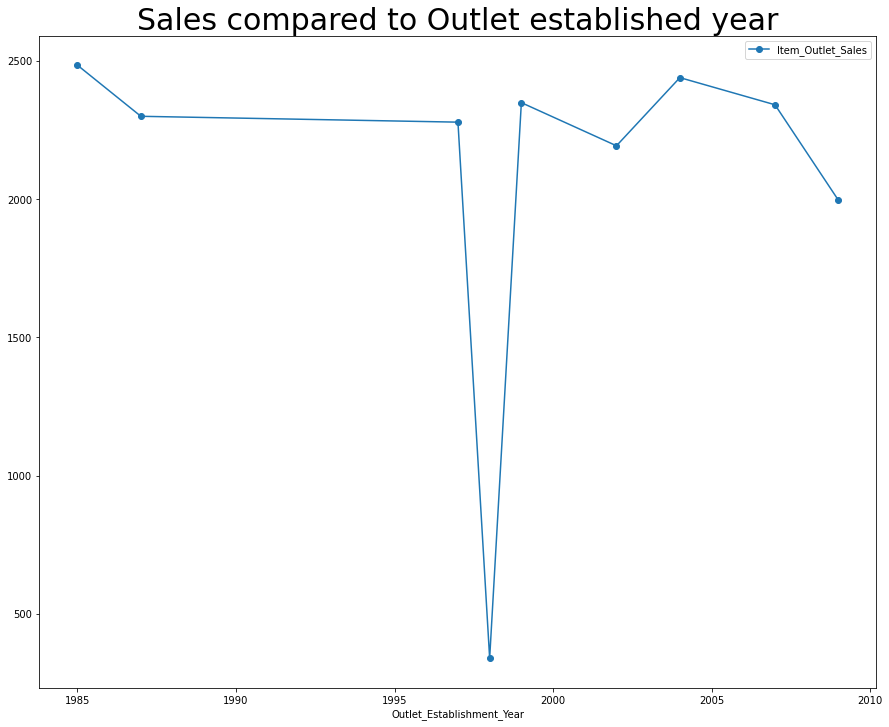

In [ ]:
#Plots item sales vs outlet year established
line_df.plot(y=['Item_Outlet_Sales'], subplots=True, marker='o', figsize=(15,12));
plt.title('Sales compared to Outlet established year', fontsize=30)

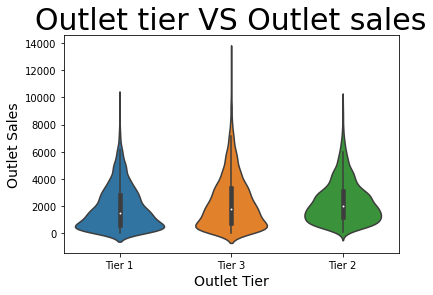

In [ ]:
#creates violin boxplot to show outlet tier vs sales
boxplot = sns.violinplot(data=df, x='Outlet_Location_Type',y='Item_Outlet_Sales')


boxplot.axes.set_title("Outlet tier VS Outlet sales", fontsize=30)
boxplot.set_ylabel("Outlet Sales", fontsize=14)
boxplot.set_xlabel("Outlet Tier", fontsize=14);

In [ ]:
##############################################################################################################################################################################################

# start of Liner regression

In [ ]:
# Make a linear regression instance
reg = LinearRegression()

In [ ]:
reg.fit(X_train_processed, y_train)
#Now that the model has "learned" the patterns, it is time to see how well it is able to make predictions.  

LinearRegression()

In [ ]:
#Measuring Model Performance
train_score = reg.score(X_train_processed, y_train)
print(train_score)

0.5615550749122269


In [ ]:
test_score = reg.score(X_test_processed, y_test)
print(test_score)

0.5671055563179823


In [ ]:
train_preds = reg.predict(X_train_processed)

test_preds = reg.predict(X_test_processed)

In [ ]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

In [ ]:
print(r2_train)
print(r2_test)

0.5615550749122269
0.5671055563179823


In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [ ]:
print(rmse_train)
print(rmse_test)

1139.1041807805507
1092.8613535743607


In [ ]:
##############################################################################################################################################################################################

# End of Liner regression

In [ ]:
##############################################################################################################################################################################################

# Start of tree model

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
tree_train_preds = dec_tree.predict(X_train_processed)
tree_test_preds = dec_tree.predict(X_test_processed)

In [ ]:
# evaluate the model
tree_train_score = dec_tree.score(X_train_processed, y_train)
tree_test_score = dec_tree.score(X_test_processed, y_test)
print(tree_train_score)
print(tree_test_score)

1.0
0.18409072273251326


In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) 
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

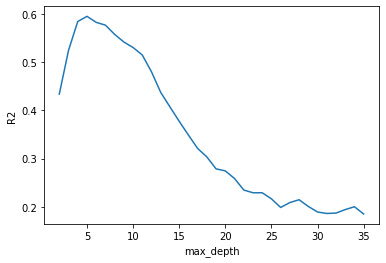

In [ ]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
dec_tree_4 = DecisionTreeRegressor(max_depth = 4, random_state = 42)
dec_tree_4.fit(X_train_processed, y_train)
train_4_score = dec_tree_4.score(X_train_processed, y_train)
test_4_score = dec_tree_4.score(X_test_processed, y_test)
print(train_4_score)
print(test_4_score)

0.5826254141089582
0.5840048628592629


In [ ]:
tree_r2_train = r2_score(y_train, tree_train_preds)
tree_r2_test = r2_score(y_test, tree_test_preds)

In [ ]:
tree_rmse_train = np.sqrt(mean_squared_error(y_train, tree_train_preds))
tree_rmse_test = np.sqrt(mean_squared_error(y_test, tree_test_preds))

In [ ]:
print(tree_r2_train)
print(tree_r2_test)

1.0
0.18409072273251326


In [ ]:
print(tree_rmse_train)
print(tree_rmse_test)

5.50728349323243e-15
1500.3583454934153


# **r^2**

**Linear regression scores:**

0.5616

0.5669

**Tree regression scores:**

1.0

0.1840

# **RMSE**

**Linear regression scores:**

1138.9540

1092.9962

**Tree regression scores:**

5.5072

1500.3583

In [ ]:
##############################################################################################################################################################################################

# End of tree model

# **Question 3**

Linear regression seems to be the much more accurate model here, the prediction
scores are much closer than the tree regression model

In [ ]:
y_test, test_preds

array([1360.53125  ,  717.53125  ,  881.5390625, ..., 3303.7421875,
       2028.609375 , 2460.828125 ])